# Laplacian Associative Memory (LAM) - DEV 09

[Multiscale representations of community structures in attractor neural networks](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8412329/pdf/pcbi.1009296.pdf) (2021)

- Sigma Autopsy

In [1]:
from nn import LAM
import libtools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# np.random.seed(123)

---

#### LOAD DATA

In [4]:
# SOM ORIENTATION
src = np.load('../data/mat/SOM_orient_v1.npy')
src = libtools.downsample_matrix(src, 4)

(51, 51)
θ | min: 0.0012 max: 6.282


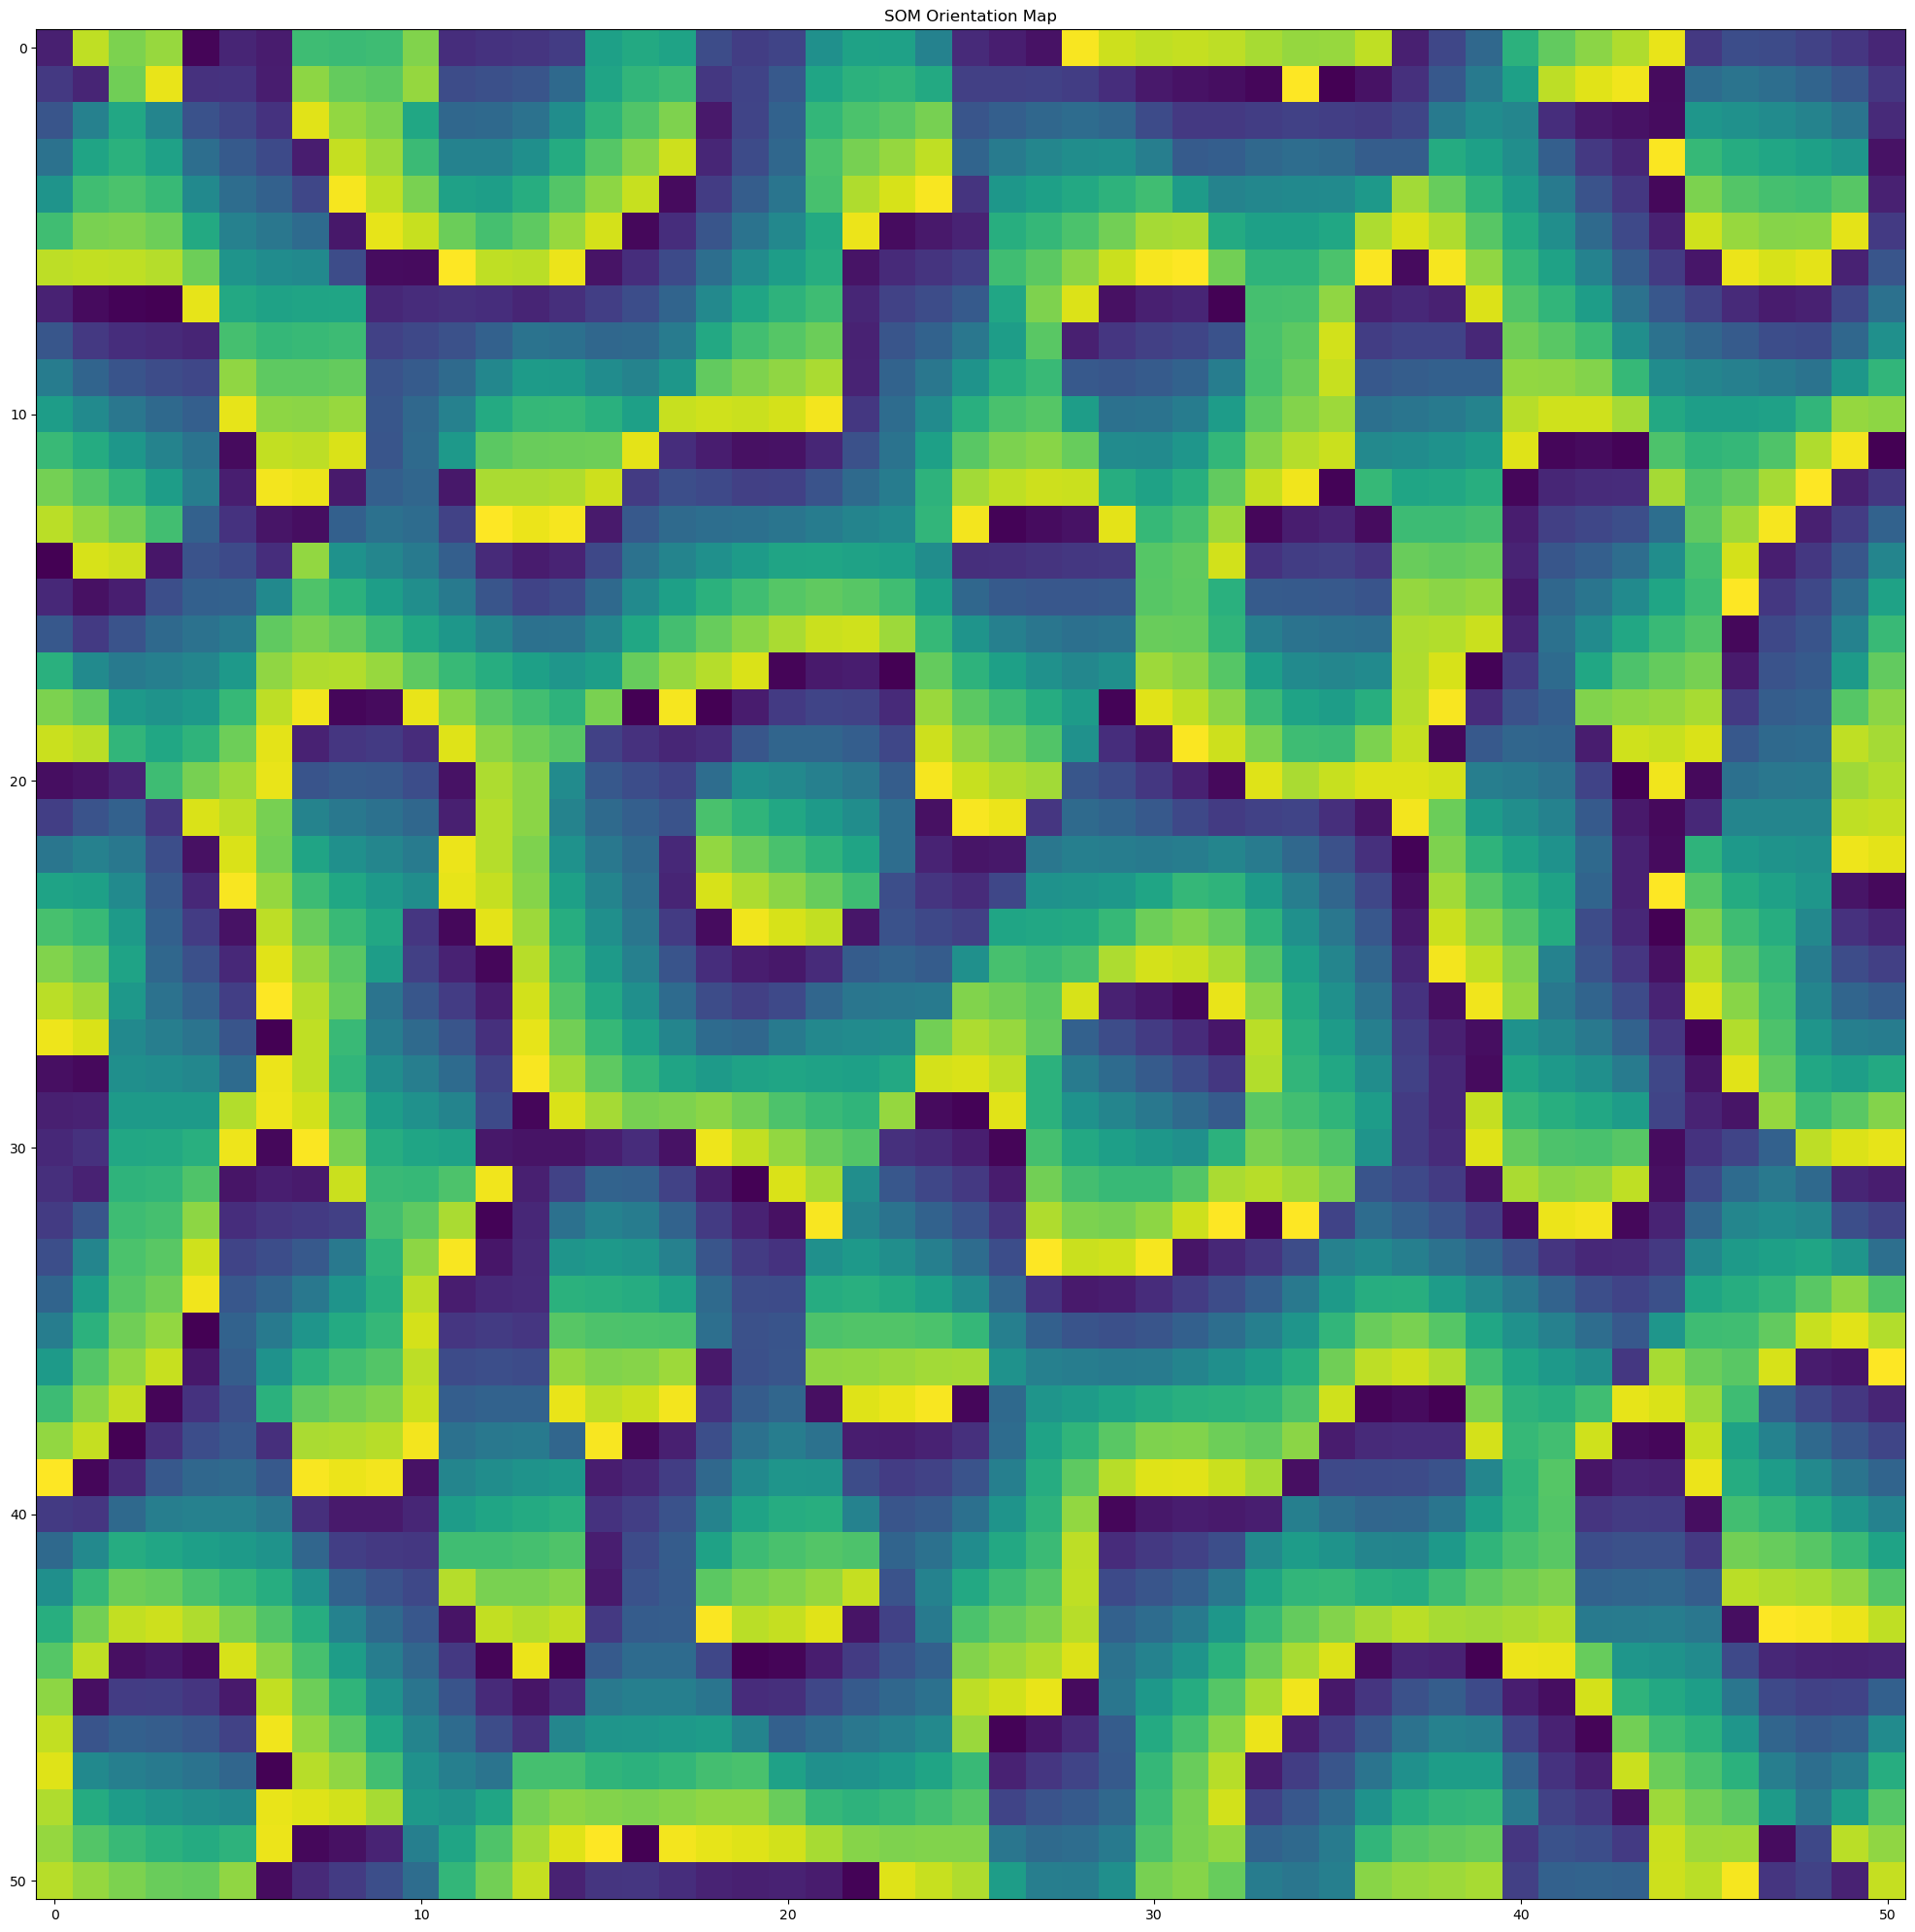

In [5]:
plt.figure(figsize=(20,20))
plt.imshow(src)
plt.title('SOM Orientation Map')
plt.tight_layout()

print(src.shape)
print('θ | min:', round(src.min(),4), 'max:', round(src.max(),4))

---

### Hyper-parameters

In [6]:
N = 4096                                                         # Neurons | Default: 30000
P = src.shape[0] * src.shape[1]                                  # N_nodes
prob = 0.1                                                       # Sparsity
eta = 0.01                                                       # Epsilon / Learning rate
epochs = 3000                                                    # Steps
gamma = 0.6                                                      # Inhibition ratio
a_arr = np.arange(-1.5, 1.5, 0.1)                                # Alpha range
norm_mode = 'asym'                                               # Asymmetric Normalisation

# Initial Condition - Center cell of the grid
start_node = int(int(src.shape[0]/2) * src.shape[1] + int(src.shape[0]/2))
print('Start node:', start_node)

# Malloc
a_hist, m_hist = [], []
obj_hist = np.zeros([len(a_arr), epochs])

Start node: 1300


In [7]:
rad = 5 # Search/boundary radius
sigmaX = 2.0 # Spatial domain
sigmaA = 0.5 # Angular component

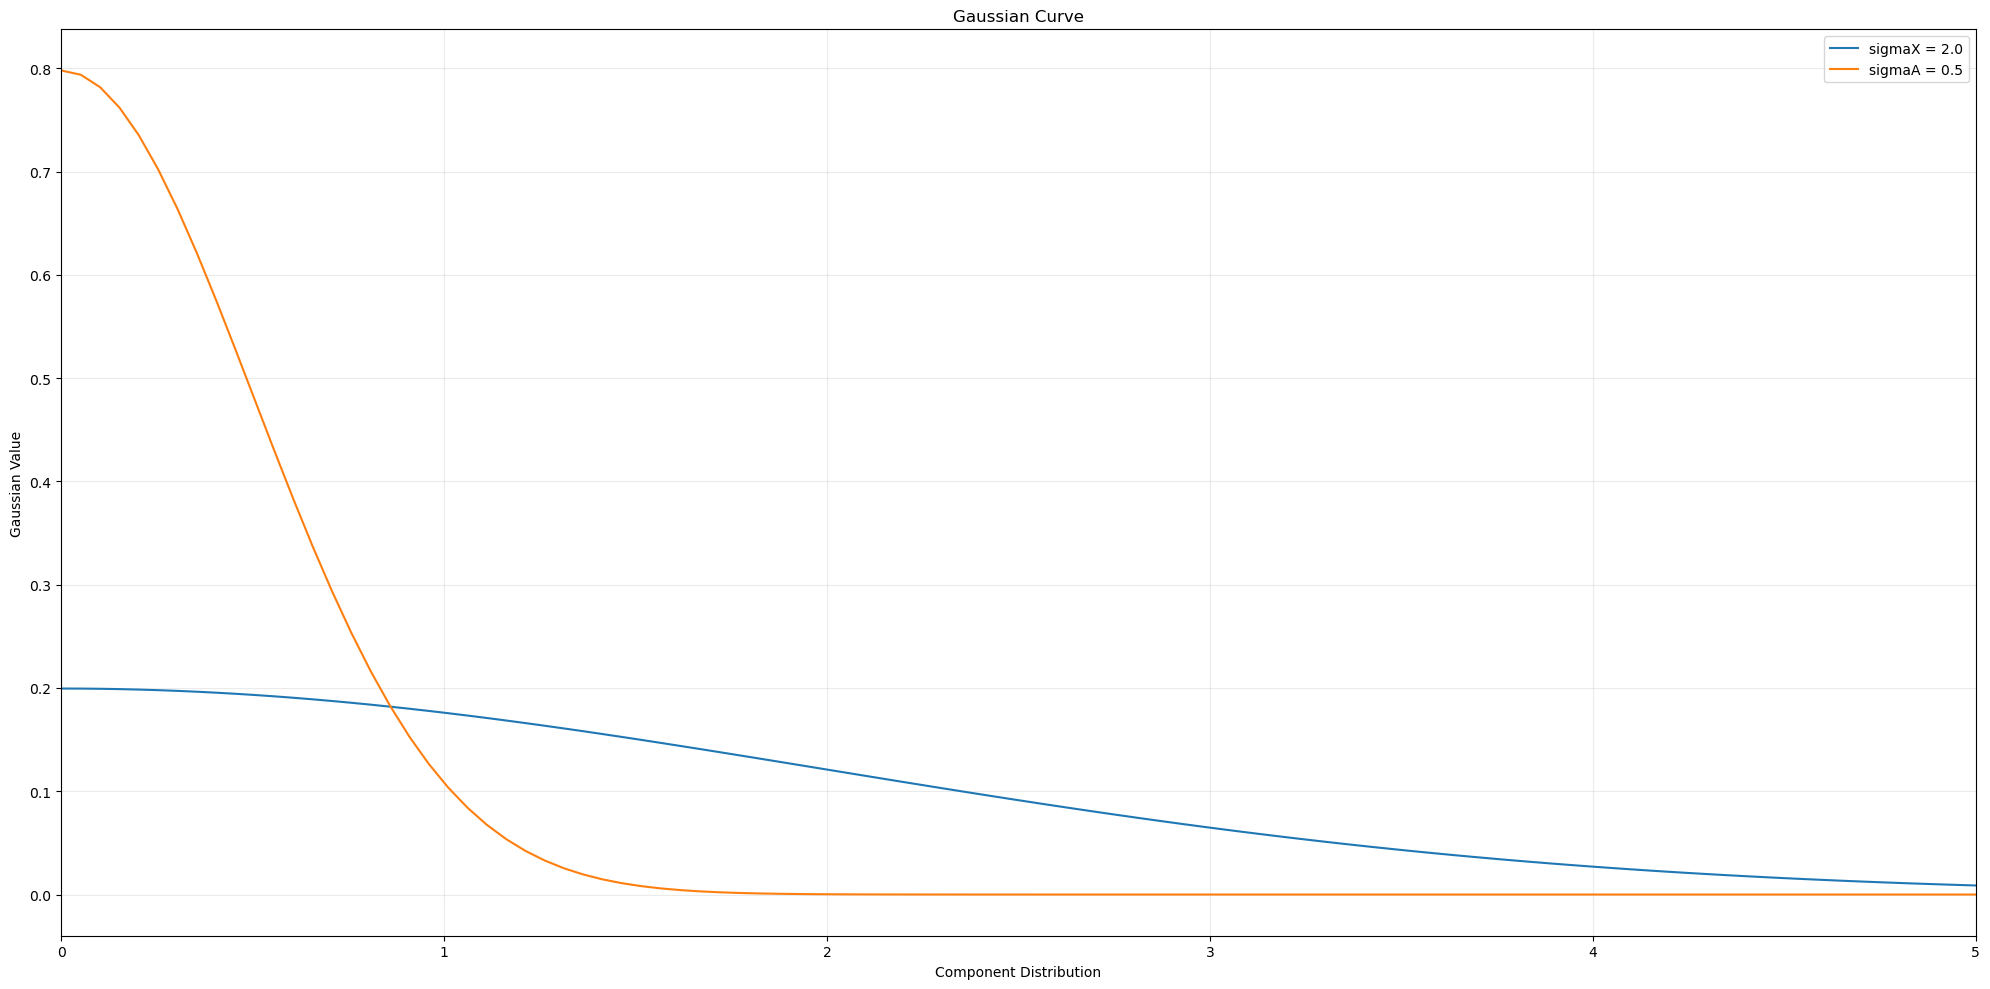

In [8]:
dist = np.linspace(0, rad, 100)

spatial_gaussian = libtools.gaussian(dist, sigmaX)
angular_gaussian = libtools.gaussian(dist, sigmaA)

# Plot the Gaussian curves
plt.figure(figsize=(20, 10))
plt.plot(dist, spatial_gaussian, label=f'sigmaX = {sigmaX}')
plt.plot(dist, angular_gaussian, label=f'sigmaA = {sigmaA}')
plt.title('Gaussian Curve')
plt.xlabel('Component Distribution'), plt.ylabel('Gaussian Value')
plt.xlim([0, rad]), plt.grid(alpha=0.25), plt.legend()
plt.tight_layout()

---

### SigmaX - Spatial Domain - [1,4,10]

In [9]:
sigmaX = np.array([1,4,10]).astype(float)
sigmaA = 1.0

In [10]:
W = libtools.construct(src, rad, sigmaX[0], sigmaA) # Construct Graph

_, v = libtools.GL_eigen(W, 'asym') # GL Eigenvalues

# LAM
graph = LAM(N, P, prob, W, gamma, "asym")
alpha = -0.9; graph._set_weight(alpha)
m_log, obj_log = graph.simulate_single(alpha, eta, epochs, start_node)
m = m_log[-1,:]

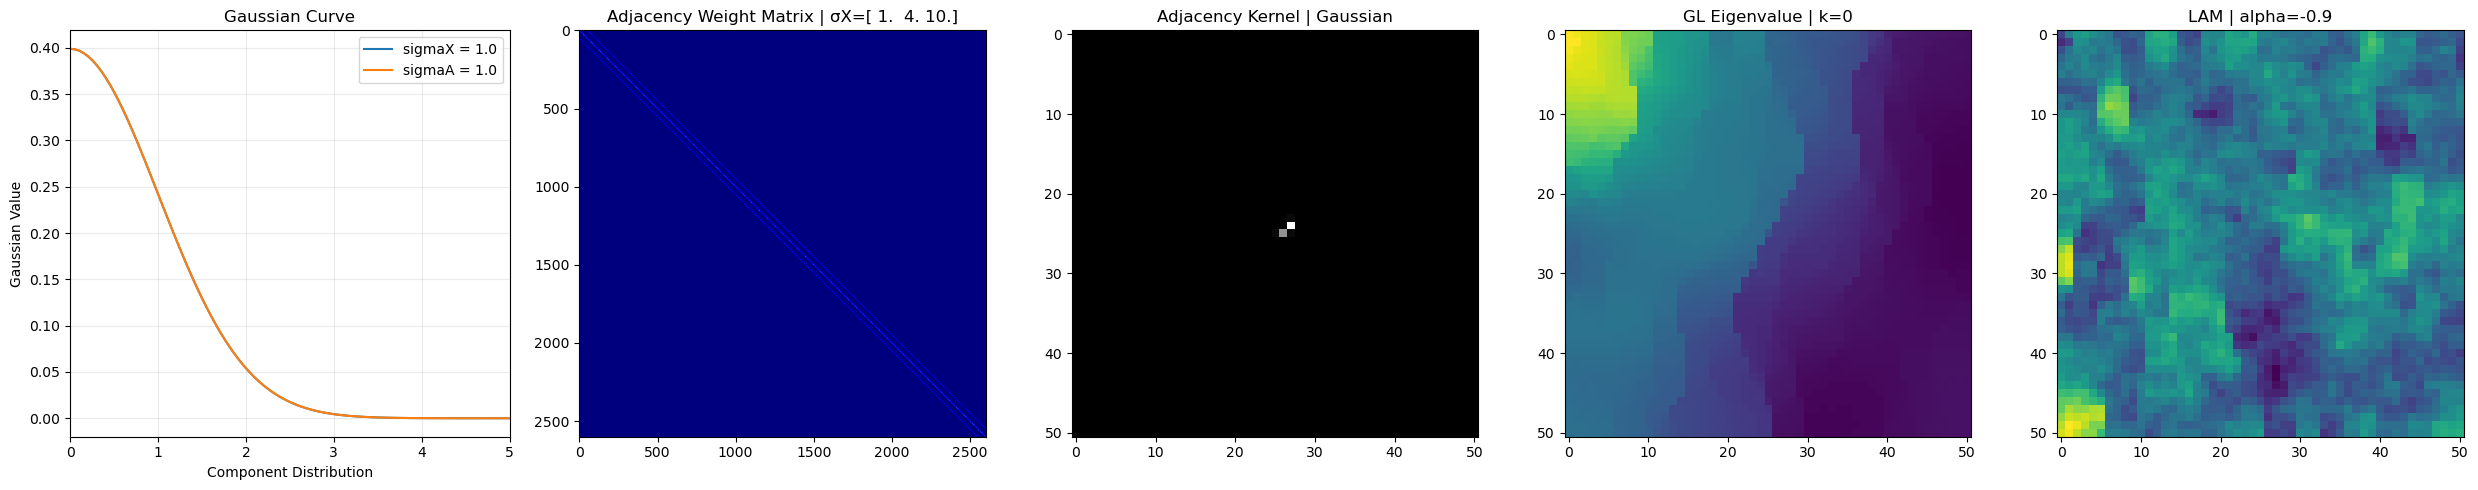

In [11]:
plt.figure(figsize=(25,5))

plt.subplot(1, 5, 1)

plt.plot(dist, libtools.gaussian(dist, sigmaX[0]), label=f'sigmaX = {sigmaX[0]}')
plt.plot(dist, libtools.gaussian(dist, sigmaA), label=f'sigmaA = {sigmaA}')
plt.title('Gaussian Curve')
plt.xlabel('Component Distribution'), plt.ylabel('Gaussian Value')
plt.xlim([0, rad]), plt.grid(alpha=0.25), plt.legend()

plt.subplot(1, 5, 2)
plt.imshow(W, 'jet')
plt.title('Adjacency Weight Matrix | σX=' + str(sigmaX))

plt.subplot(1, 5, 3)
plt.imshow(W[1250].reshape((src.shape[0], src.shape[1])), 'gray')
plt.title('Adjacency Kernel | Gaussian')

plt.subplot(1, 5, 4)
k = 0
plt.imshow(v[:,k].reshape((src.shape[0], src.shape[1])), vmin=np.min(v[:,k]), vmax=np.max(v[:,k]))
plt.title('GL Eigenvalue | k='+ str(k))

plt.subplot(1, 5, 5)
plt.imshow(m.reshape((src.shape[0],src.shape[1])), vmin=np.min(m), vmax=np.max(m))
plt.title('LAM | alpha=' + str(alpha)), plt.tight_layout()

plt.tight_layout()